In [1]:
import requests
import re
import nltk
import pymorphy2

from bs4 import BeautifulSoup
from omegaconf import OmegaConf
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm.notebook import tqdm

from parser.parse import Parser
from razdel import tokenize
import numpy as np
import os

import html_text

In [2]:
data = 'description'
c_voc = set()
c_rel = []
c_corp = []
c_news = []
c_people_name = []

# for i in sorted(os.listdir(data)):
# i = sorted(os.listdir(data))[6]
# if True:
for i in sorted(os.listdir(data)):
    # get vocabulary by istina
    args = OmegaConf.load(data+'/'+i)
    html = requests.get(args.istina_people).text
    parser = Parser()
    reference = parser.istina_parser(html)
    vocabulary = parser.get_vocab(reference['publishes'] + reference['place'] + 
                                  reference['coauthors'] + args.name.split())
    
    # get vocabulary by news in corresponding .yaml file
    vocabulary = list(vocabulary)
    corpus = []
    relevant = []
    actual_news = []
    parser = Parser()
    for item in tqdm(args.news):
        try:
            html = requests.get(item[0])
        except:
            continue
#         print(item, html.status_code)
        if html.status_code != 200:
            continue
        html = html.text
        text = html_text.extract_text(html, guess_layout=False)#parser.common_parser(html)
#         print('text', len(text), end='\n\n\n')
        if len(text) > 7:
#             print(text)
            actual_news.append(item[0])
            relevant.append(item[1])
            corpus.append(text)
            vocabulary.extend(parser.get_vocab(list((i.text for i in tokenize(text)))))
    vocabulary = set(vocabulary)
    c_voc = c_voc | vocabulary
    c_rel.append(relevant)
    c_corp.append(corpus)
    c_news.append(actual_news)
    c_people_name.append(args.name.split())
    vocabulary = list(vocabulary)

c_voc = list(c_voc)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [2]:
from parser.parse import Parser
html = requests.get('https://amaslov.me/ru/about_me/')
parser = Parser()
text = parser.common_parser(html.text)

In [3]:
text

'      马斯洛夫 •阿列克謝（英语：Maslov Alexey）  俄罗斯汉学博士，历史学家，莫斯科大学亚非学院院长 、 俄罗斯科学院远东研究所学术主任、 俄罗斯高等经济大学亚洲学学院教授。他的主要研究对象是中国及其政治文化，宗教传统， 经济史. 俄罗斯少林武术联盟会主席    '

In [7]:
from parser.parse import Parser
html = requests.get('https://amaslov.me/ru/about_me/')
parser = Parser('html5lib')
text = parser.common_parser(html.text)
text

'      马斯洛夫 •阿列克謝（英语：Maslov Alexey）  俄罗斯汉学博士，历史学家，莫斯科大学亚非学院院长 、 俄罗斯科学院远东研究所学术主任、 俄罗斯高等经济大学亚洲学学院教授。他的主要研究对象是中国及其政治文化，宗教传统， 经济史. 俄罗斯少林武术联盟会主席    '

In [13]:
from io import StringIO
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = True
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

res = strip_tags(html.text)
res

'\n\n\n\n\n\n\n(function(html){html.className = html.className.replace(/\\bno-js\\b/,\'js\')})(document.documentElement);\nОб Алексее Маслове — Alexey Maslov / Алексей Маслов\n\n\n\n                function apbct_attach_event_handler__backend(elem, event, callback) {                    if(typeof window.addEventListener === "function") elem.addEventListener(event, callback);                    else                                                elem.attachEvent(event, callback);                }                apbct_attach_event_handler__backend(document, \'DOMContentLoaded\', function(){                    if (typeof apbctLocalStorage === "object" && ctPublic.data__key_is_ok) {                        apbctLocalStorage.set(\'ct_checkjs\', \'1610947525\', true );                    } else {                        console.log(\'APBCT ERROR: apbctLocalStorage object is not loaded.\');                    }                  });    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\t\n\t\t\t\t\t\t\t\n\t\t\t\n\t\

In [12]:
res.decode('UTF-8')

AttributeError: 'str' object has no attribute 'decode'

In [25]:
import sqlite3 as sl

In [23]:
import html_text
html = requests.get('https://phys.chem.msu.ru/people/nikiforov-ai/')
html_text.extract_text(html.text, guess_layout=False)

'Никифоров Александр Игоревич | Кафедра физической химии МГУ имени М.В. Ломоносова Химический факультет СДО Canvas BBB Cloud Почта Меню Главная Новости Лента новостей Объявления События О кафедре Руководство кафедры В. В. Лунин Методическая комиссия Экспертная комиссия Лаборатории Сотрудники Учёба Практикум Физическая химия Кристаллохимия Квантовая химия Студентам кафедры 4 курс 5 курс 6 курс Аспирантам Наука Оборудование Никифоров Александр Игоревич Главная people Никифоров Александр Игоревич м.н.с. НИЛ адсорбции и катализа Преподаваемые дисциплины Название Курс Семестр Форма отчётности Экспериментальные методы в гетерогенном катализе: исследование свойств поверхности и кинетический анализ 5 весенний экзамен Новости Химики МГУ разработали физико-химическую модель для эффективного разделения редкоземельных элементов 23 Апр 2022 Резонансная многофотонная ионизация хромофора зеленого флуоресцентного белка в растворе 27 Янв 2022 Дизайн сверхбыстрых фоточувствительных молекулярных моторов 

In [10]:
html.content.decode('utf-8')

'<!DOCTYPE html>\n<html lang="ru-RU" class="no-js no-svg">\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<link rel="profile" href="https://gmpg.org/xfn/11">\n\n<script>(function(html){html.className = html.className.replace(/\\bno-js\\b/,\'js\')})(document.documentElement);</script>\n<title>Об Алексее Маслове &#8212; Alexey Maslov / Алексей Маслов</title>\n<meta name=\'robots\' content=\'max-image-preview:large\' />\n<link rel="alternate" href="https://amaslov.me/ru/about_me/" hreflang="ru" />\n<link rel="alternate" href="https://amaslov.me/en/4674-2/" hreflang="en" />\n<script>                function apbct_attach_event_handler__backend(elem, event, callback) {                    if(typeof window.addEventListener === "function") elem.addEventListener(event, callback);                    else                                                elem.attachEvent(event, callback);                }                apbct_attach_event_handle

In [11]:
dir(html)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [18]:
html.text

'<!DOCTYPE html>\n<html lang="ru-RU" class="no-js no-svg">\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<link rel="profile" href="https://gmpg.org/xfn/11">\n\n<script>(function(html){html.className = html.className.replace(/\\bno-js\\b/,\'js\')})(document.documentElement);</script>\n<title>Об Алексее Маслове &#8212; Alexey Maslov / Алексей Маслов</title>\n<meta name=\'robots\' content=\'max-image-preview:large\' />\n<link rel="alternate" href="https://amaslov.me/ru/about_me/" hreflang="ru" />\n<link rel="alternate" href="https://amaslov.me/en/4674-2/" hreflang="en" />\n<script>                function apbct_attach_event_handler__backend(elem, event, callback) {                    if(typeof window.addEventListener === "function") elem.addEventListener(event, callback);                    else                                                elem.attachEvent(event, callback);                }                apbct_attach_event_handle

In [3]:
c_people_name

[['Маслов', 'Алексей', 'Александрович'],
 ['Садовничий', 'Виктор', 'Антонович'],
 ['Садовничий', 'Юрий', 'Викторович'],
 ['Бородаев', 'Владимир', 'Алексеевич'],
 ['Тарасов', 'Алексей', 'Борисович'],
 ['Функ', 'Дмитрий', 'Анатольевич'],
 ['Жигулина', 'Алёна', 'Владимировна'],
 ['Бунина', 'Елена', 'Игоревна'],
 ['Шаракин', 'Сергей', 'Александрович'],
 ['Никифоров', 'Александр', 'Игоревич']]

In [4]:
len(c_voc)

26373

In [5]:
len(c_corp)

10

In [6]:
len(c_news)

10

In [8]:
c_rel

[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]]

In [10]:
c_rel_onedim = []
c_news_onedim = []
for i in c_rel:
    c_rel_onedim += i
for i in c_news:
    c_news_onedim += i

In [11]:
c_news_onedim[23]

'https://www.msu.ru/info/struct/rectintv_arch/viktor_sadovnichiy_zhena_do_sikh_por_serditsya_na_menya_za_svadbu_rektoru_glavnogo_rossiyskogo_vuza_.html'

In [12]:
parser.common_parser(requests.get(c_news_onedim[23]).text)

'Когда говорят “МГУ им. Ломоносова”, то в мыслях предстает не только знаменитое высотное здание на Воробьевых горах, но и его ректор — Виктор САДОВНИЧИЙ. Вот уже 17 лет он руководит главным вузом страны, а всего с университетом у него связано более 50 лет жизни. Садовничий пришел сюда абитуриентом, стал студентом, аспирантом, профессором, заведующим кафедрой, проректором, ректором… 3 апреля Виктору Антоновичу исполнилось 70 лет. \r     — Виктор Антонович, ваше детство пришлось на войну. Какие воспоминания остались у вас о том времени?  — Я родился в селе Краснопавловка Лозовского района. Это на Украине, под Харьковом. В школу пошел в 1946 году, в первый послевоенный год. Вы можете представить себе, что такое было украинское село в то время… Весь класс помещался в одной комнате, в уцелевшей хате, а учительница была одна на всех. За стеной жила хозяйка, в горнице занимались мы, дети. Одно из самых запоминающихся событий тех лет — бомбардировка Японии. В нашей хате висела большая черная “

In [13]:
len(c_news_onedim)

103

In [14]:
c_voc_onedim = []
c_corp_onedim = []
for i in c_voc:
    c_voc_onedim.append(i)
for i in c_corp:
    c_corp_onedim += i
c_voc_onedim = list(set(c_voc_onedim))

In [15]:
vectorizer = TfidfVectorizer(vocabulary = c_voc_onedim) 
#TfidfVectorizer() #TfidfVectorizer(vocabulary = c_voc_onedim)
X = vectorizer.fit_transform(c_corp_onedim)

In [82]:
# for i in sorted(os.listdir(data)):
i = sorted(os.listdir(data))[0]
args = OmegaConf.load(data+'/'+i)
html = requests.get(args.istina_people).text
parser = Parser()
reference = parser.istina_parser(html)

In [83]:
ans = vectorizer.transform([" ".join(reference['publishes']), " ".join(reference['place']), 
                            " ".join(reference['coauthors']), " ".join(args.name.split())])
tfidf_score = ans*X.transpose().toarray()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

0 10
10 19
19 29
29 41
41 52
52 64
64 74
74 85
85 93
93 103


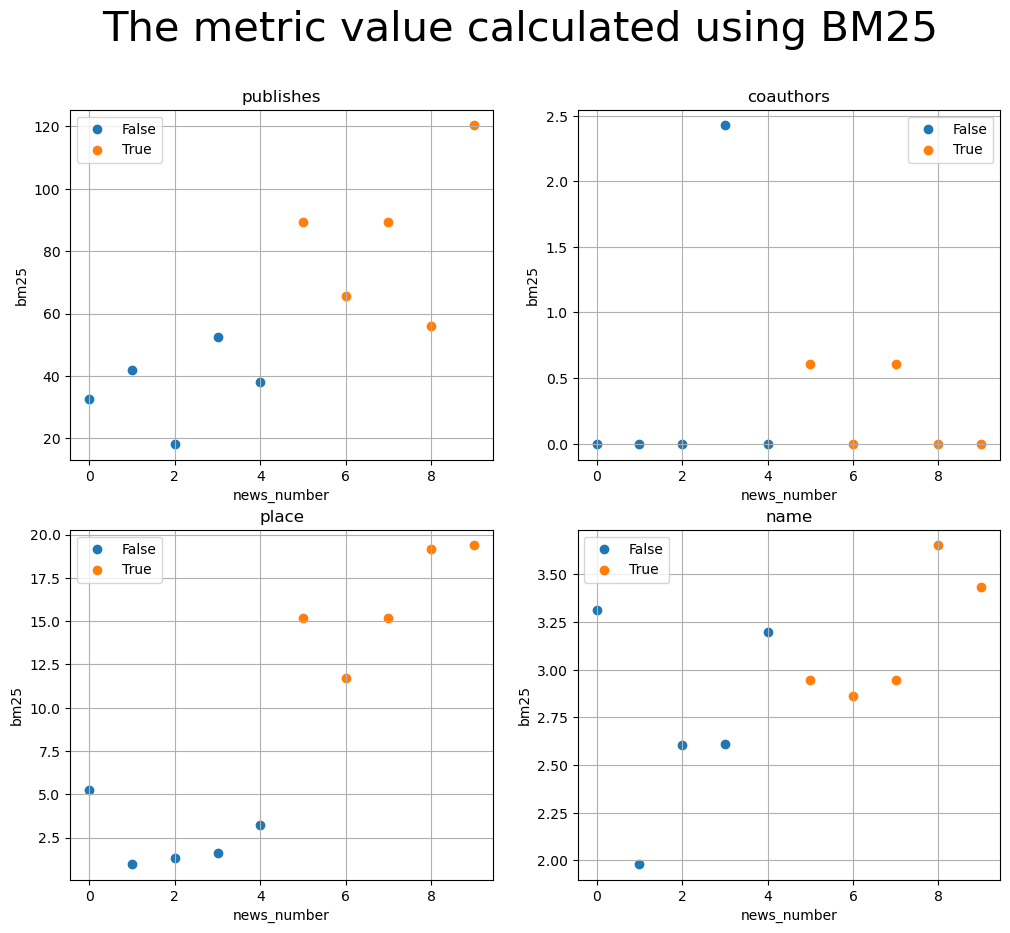

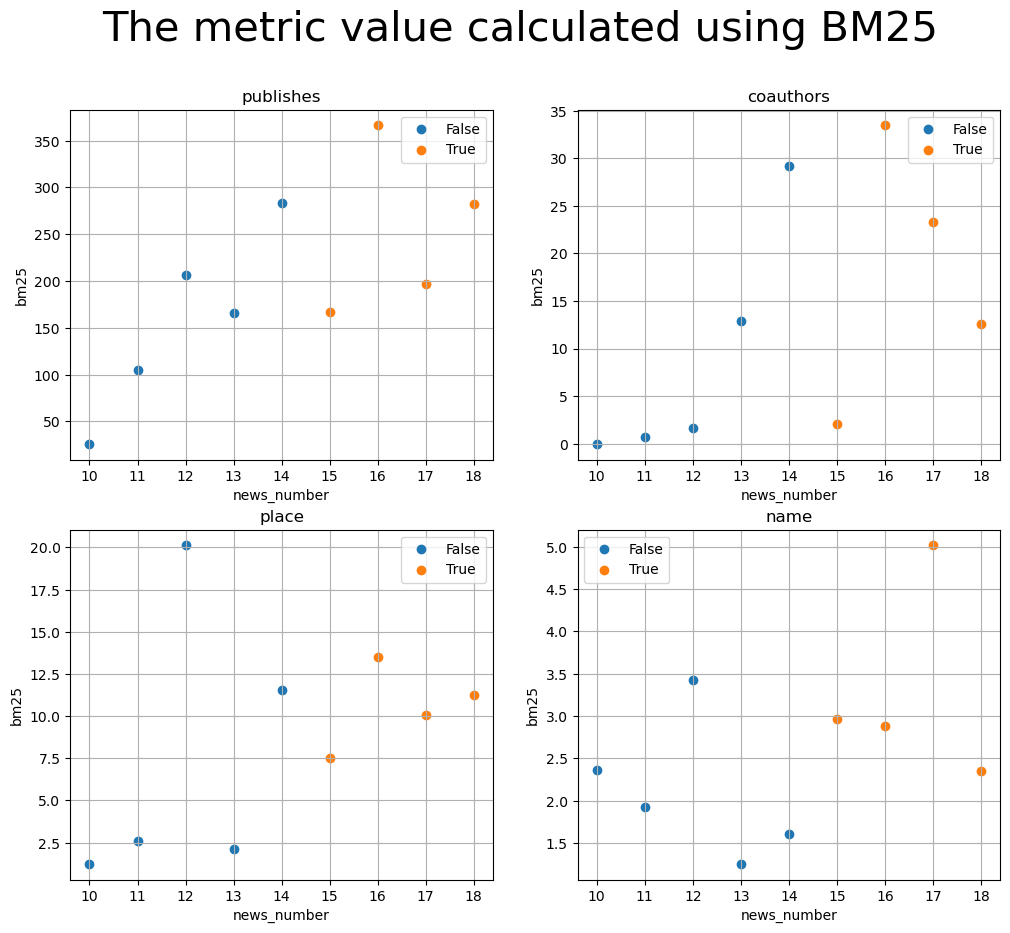

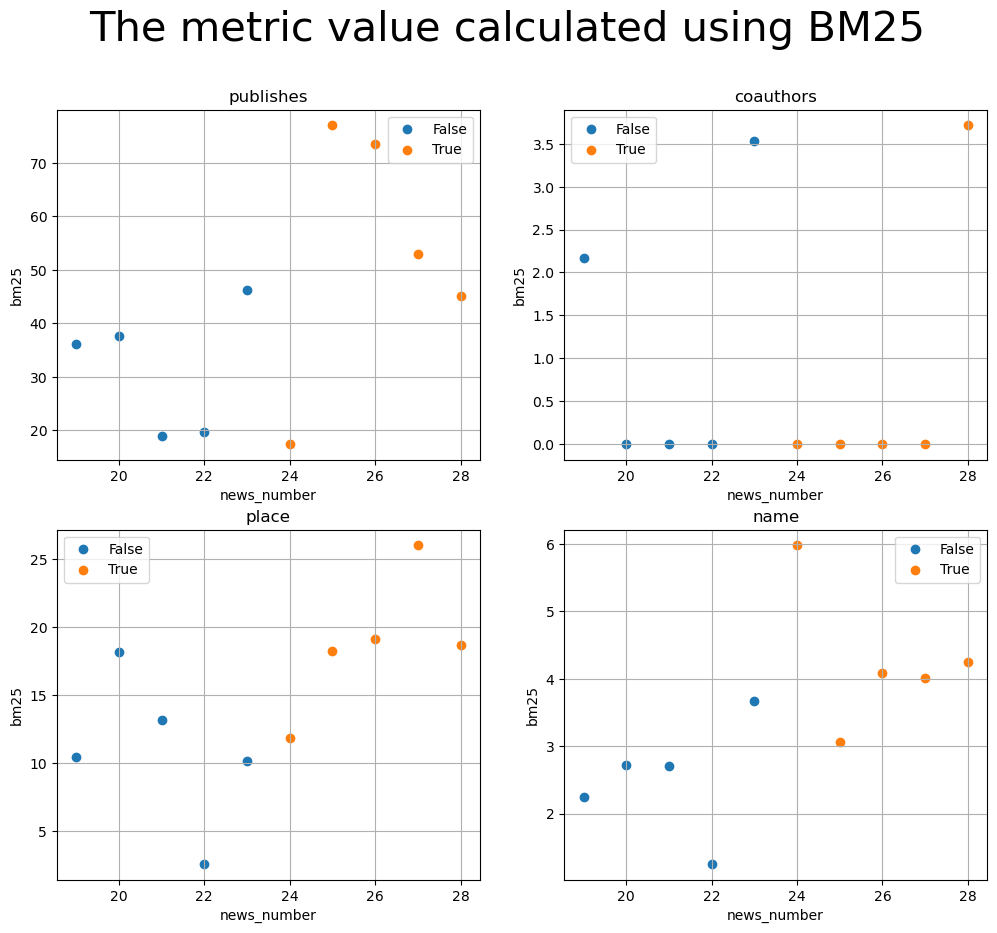

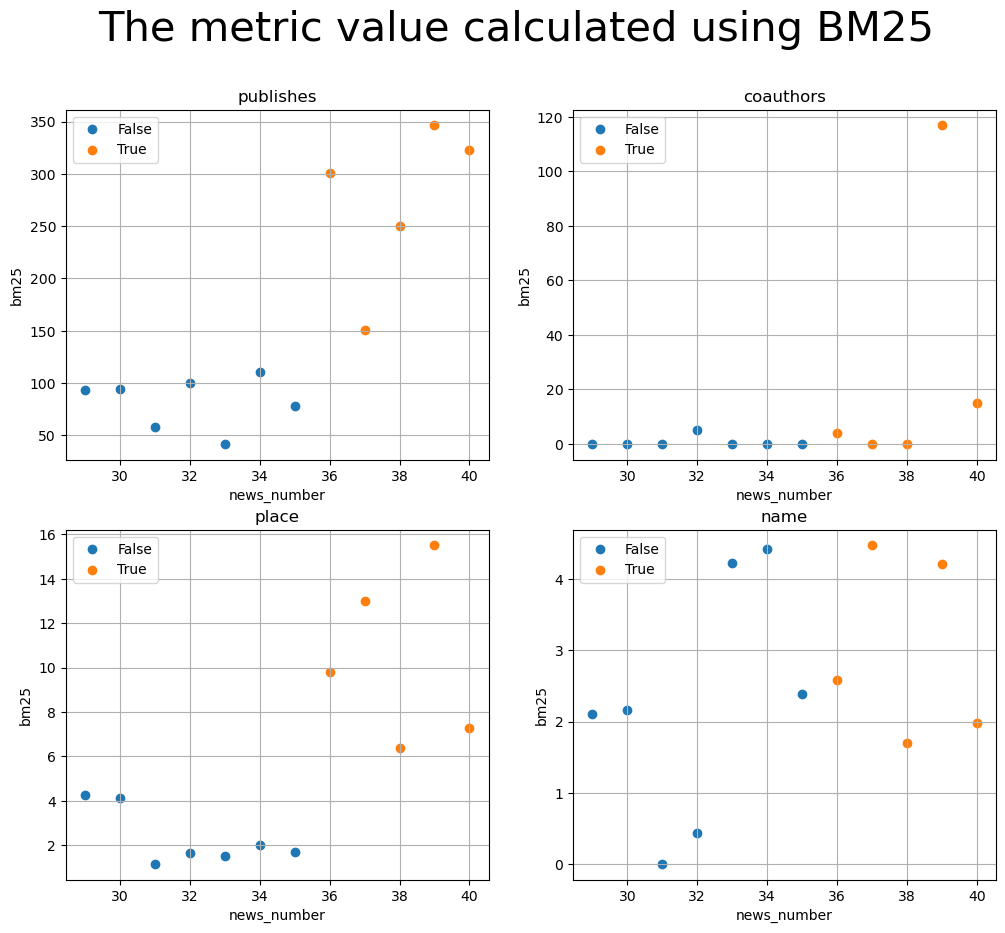

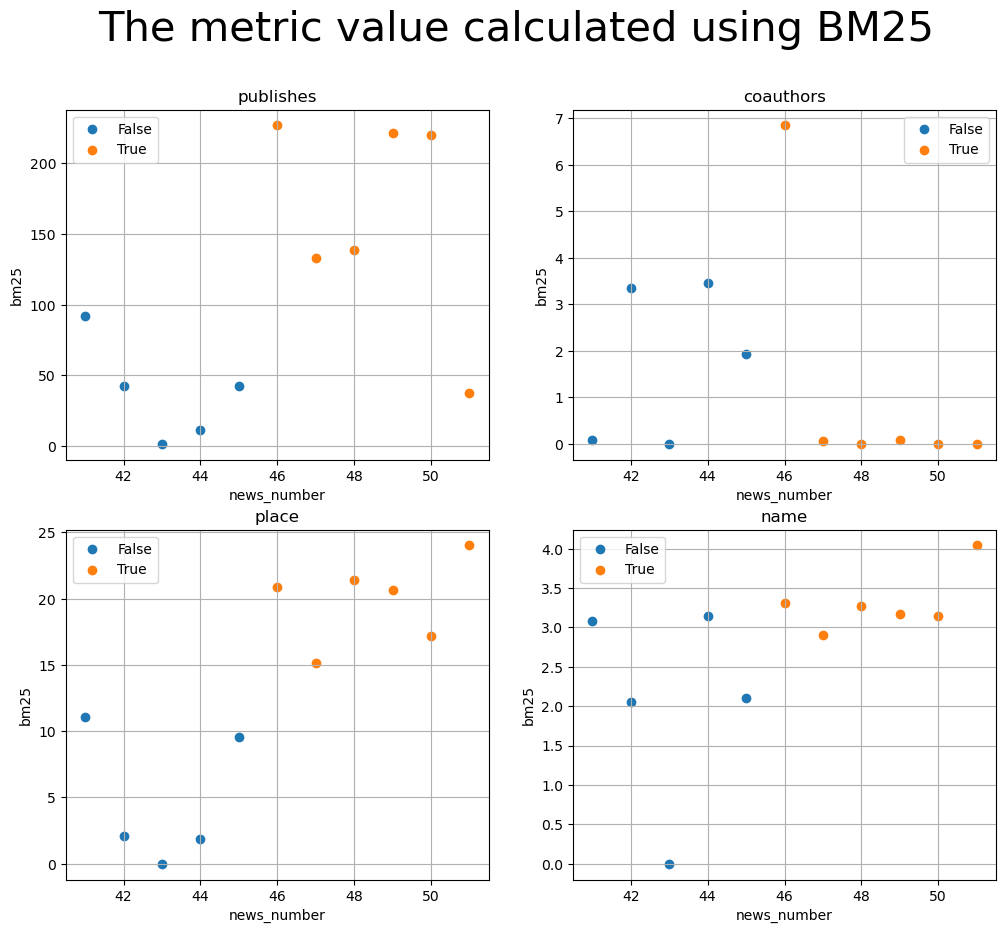

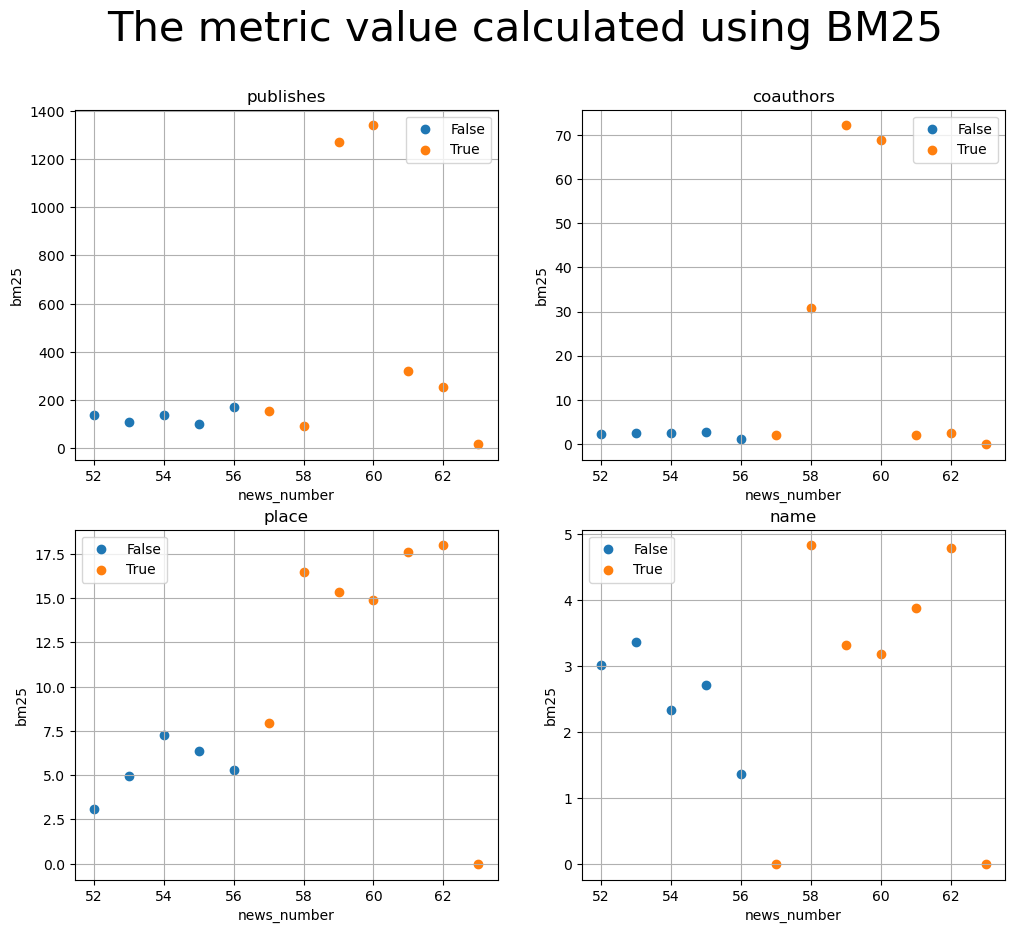

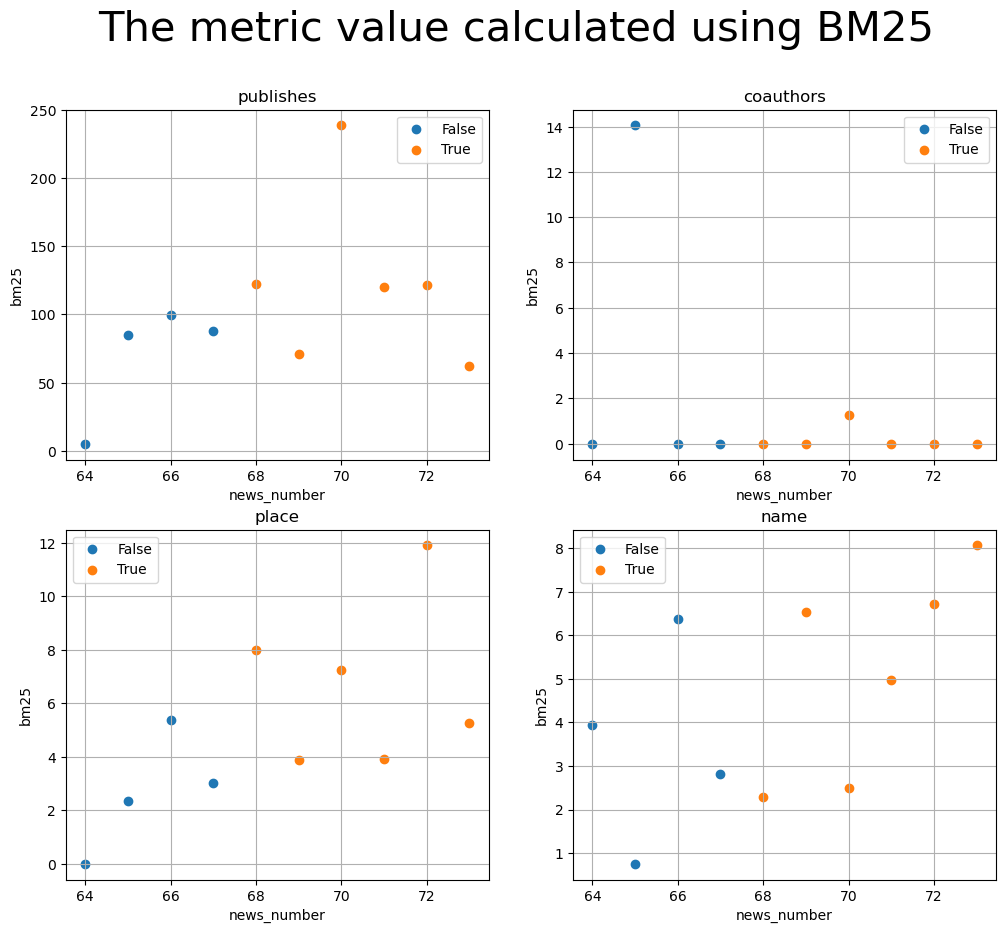

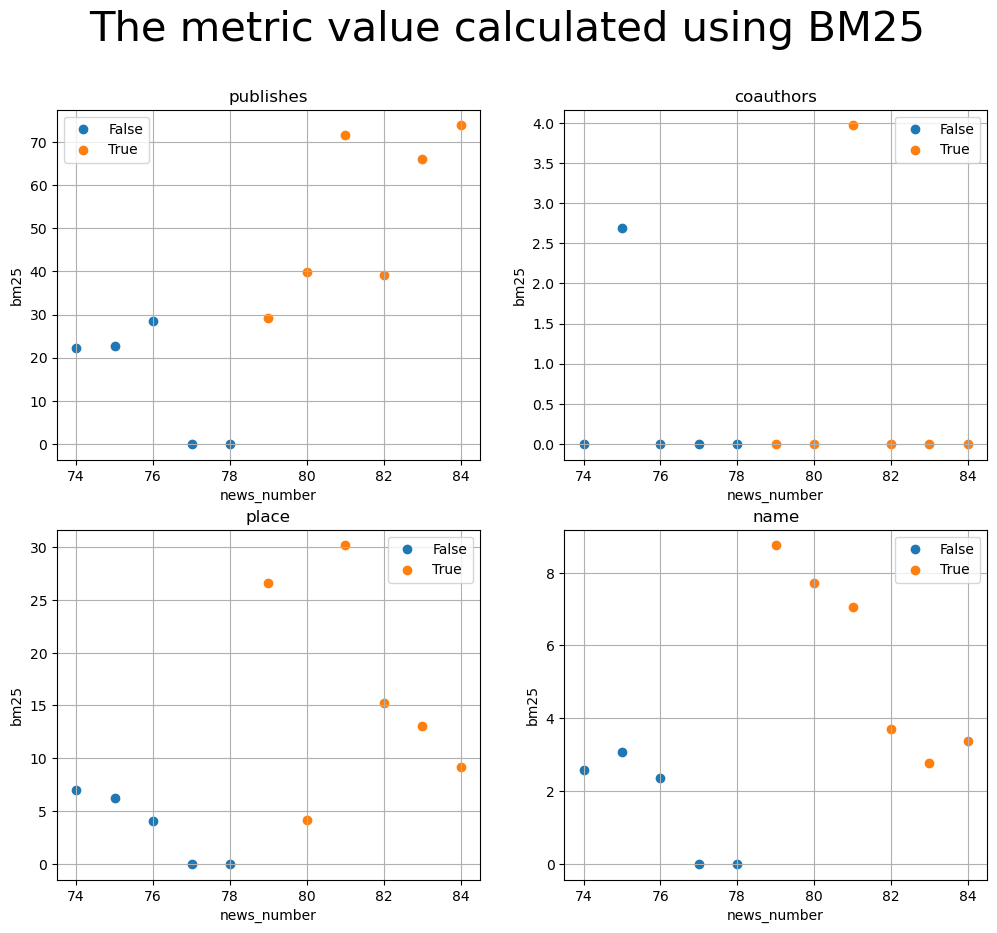

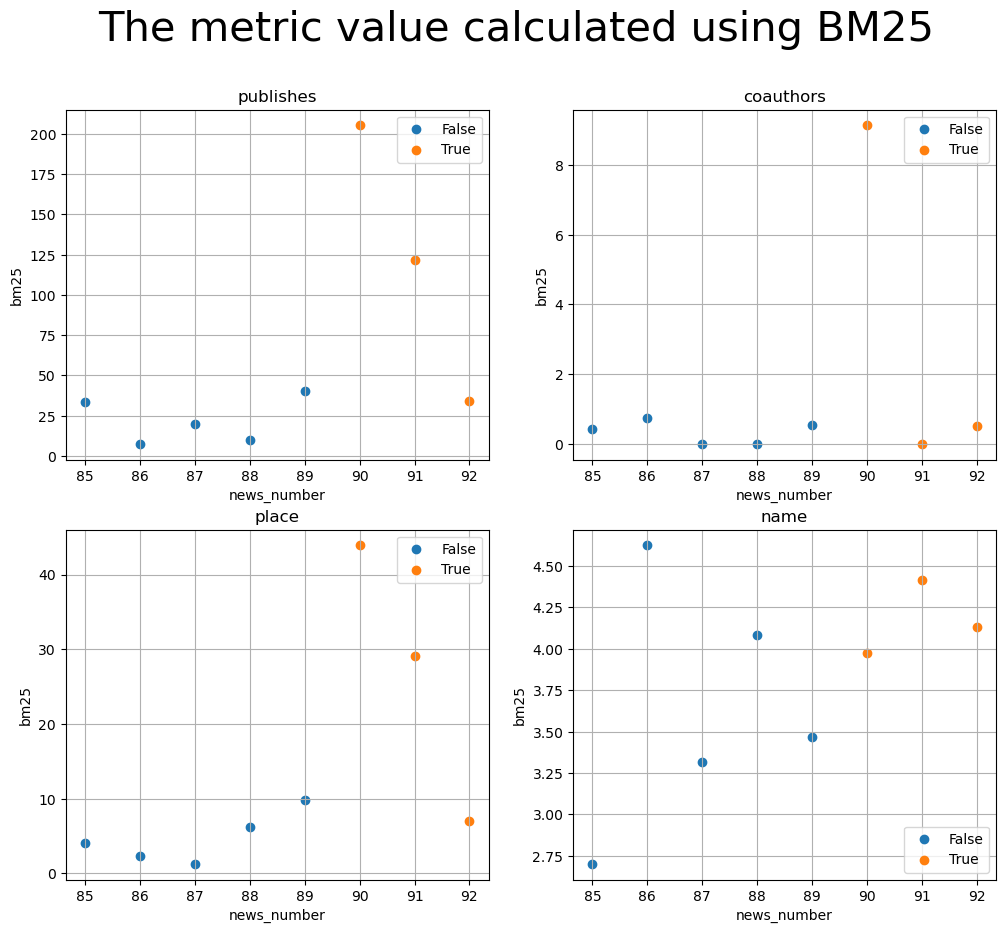

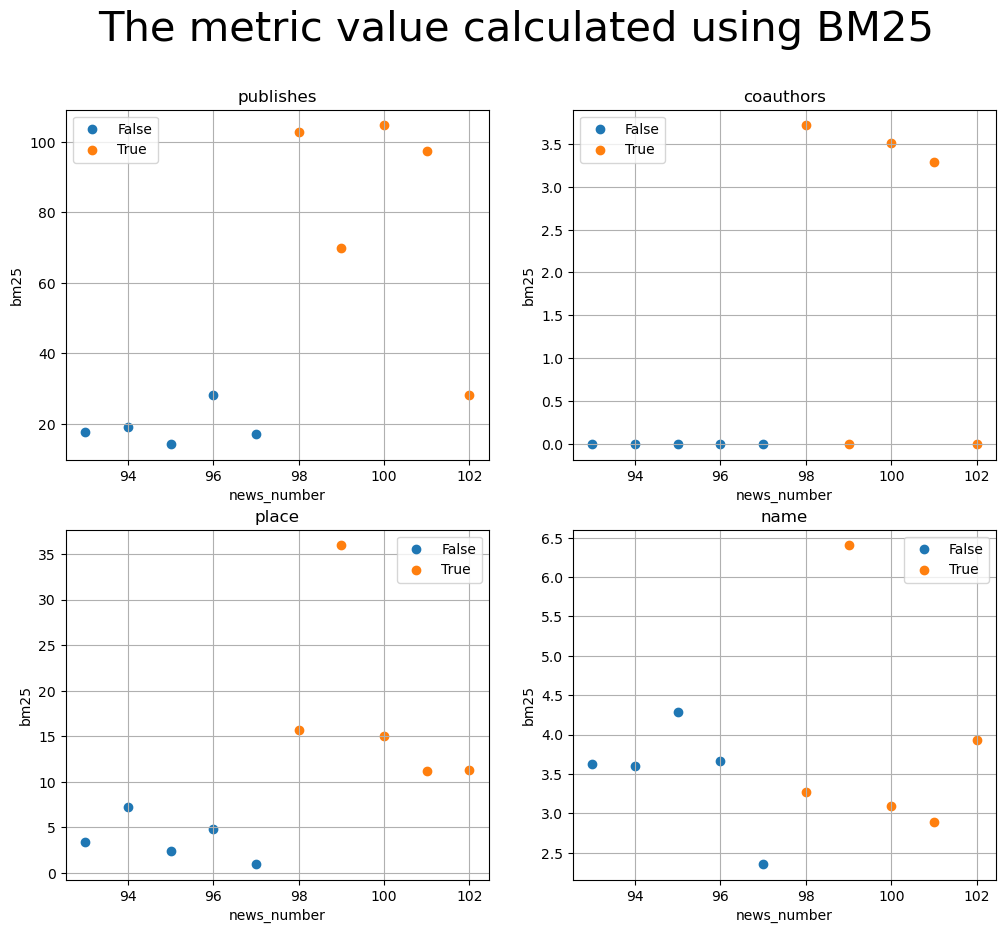

In [22]:
from itertools import compress
from rank_bm25 import BM25Okapi

x_range = np.arange(0, len(c_corp_onedim), 1)
mask = [0 for i in range(len(c_rel_onedim))]
inv_mask = [0 for i in range(len(c_rel_onedim))]
for ind, i in enumerate(c_rel_onedim):
    mask[ind] = False if i == 0 else True
    inv_mask[ind] = True if i == 0 else False
    
paths = sorted(os.listdir(data))
start=0
metric_name = 'bm25'#'tf-idf'

if metric_name == 'tf-idf':
    vectorizer = TfidfVectorizer(vocabulary = c_voc_onedim) 
    #TfidfVectorizer() #TfidfVectorizer(vocabulary = c_voc_onedim)
    X = vectorizer.fit_transform(c_corp_onedim)
    
elif metric_name == 'bm25':
    tokenized_corpus = [parser.get_vocab(list((i.text for i in tokenize(doc)))) for doc in c_corp_onedim]
    bm25 = BM25Okapi(tokenized_corpus)
        
else:
    raise NotImplementedError(f'{metric_name} not implemented')
    
for ind, i in enumerate(paths):
    args = OmegaConf.load(data+'/'+i)
    html = requests.get(args.istina_people).text
    parser = Parser()
    reference = parser.istina_parser(html)

    if metric_name == 'tf-idf':
        ans = vectorizer.transform([" ".join(reference['publishes']), " ".join(reference['place']), 
                                    " ".join(reference['coauthors']), " ".join(args.name.split())])
        score = ans*X.transpose().toarray()
    elif metric_name == 'bm25':
        score = []

        for doc in [" ".join(reference['publishes']), " ".join(reference['place']), 
                     " ".join(reference['coauthors']), " ".join(args.name.split())]:

            score.append(bm25.get_scores(parser.get_vocab(list((i.text for i in tokenize(doc))))))
    else:
        raise NotImplementedError(f'{metric_name} not implemented')


    tf = pd.DataFrame(np.array(score).T)
    tf['relevant'] = pd.Series(c_rel_onedim, index=list(range(len(tfidf_score[0]))))
    tf['cite'] = pd.Series(c_news_onedim, index=list(range(len(tfidf_score[0]))))

    stop = start+len(c_rel[ind])
    print(start, stop)
    x__ = x_range[start:stop]
    inv__ = inv_mask[start:stop]
    mask__ = mask[start:stop]
    publ = tf[0][start:stop]
    place = tf[1][start:stop]
    coauth = tf[2][start:stop]
    name = tf[3][start:stop]

    fig, ax = plt.subplots(figsize=(12,10), nrows=2, ncols=2)

    ax[0,0].set_ylabel(metric_name)
    ax[0,0].set_xlabel('news_number')
    ax[0,0].scatter(list(compress(x__, inv__)), list(compress(publ, inv__)), c='#1f77b4').set_label('False')
    ax[0,0].scatter(list(compress(x__, mask__)), list(compress(publ, mask__)), c='#ff7f0e').set_label('True')
    ax[0,0].set_title('publishes')
    ax[0,0].grid()
    ax[0,0].legend()

    ax[1,0].set_ylabel(metric_name)
    ax[1,0].set_xlabel('news_number')
    ax[1,0].scatter(list(compress(x__, inv__)), list(compress(place, inv__)), c='#1f77b4').set_label('False')
    ax[1,0].scatter(list(compress(x__, mask__)), list(compress(place, mask__)), c='#ff7f0e').set_label('True')
    ax[1,0].set_title('place')
    ax[1,0].grid()
    ax[1,0].legend()

    ax[0,1].set_ylabel(metric_name)
    ax[0,1].set_xlabel('news_number')
    ax[0,1].scatter(list(compress(x__, inv__)), list(compress(coauth, inv__)), c='#1f77b4').set_label('False')
    ax[0,1].scatter(list(compress(x__, mask__)), list(compress(coauth, mask__)), c='#ff7f0e').set_label('True')
    ax[0,1].set_title('coauthors')
    ax[0,1].grid()
    ax[0,1].legend()

    ax[1,1].set_ylabel(metric_name)
    ax[1,1].set_xlabel('news_number')
    ax[1,1].scatter(list(compress(x__, inv__)), list(compress(name, inv__)), c='#1f77b4').set_label('False')
    ax[1,1].scatter(list(compress(x__, mask__)), list(compress(name, mask__)), c='#ff7f0e').set_label('True')
    ax[1,1].set_title('name')
    ax[1,1].grid()
    ax[1,1].legend()

    fig.suptitle(f'The metric value calculated using {metric_name.upper()}', fontsize=30)
#     plt.show()
    start = start+len(c_rel[ind])
    plt.savefig(f'results/{metric_name}_{c_people_name[ind][0]+c_people_name[ind][1][0]}_for_yourself.png')

In [102]:
tf

,0,1,2,3,relevant,cite
0,4.833987,3.215347,0.000000,0.000000,0,https://lenta.ru/news/2022/07/02/masloved/
1,0.000000,0.000000,0.000000,0.000000,0,https://msk1.ru/text/world/2022/10/11/71727275/
2,3.864246,0.000000,0.000000,0.000000,0,https://newizv-ru.turbopages.org/newizv.ru/s/n...
3,6.893452,4.288896,0.000000,1.309645,0,https://www.rbc.ru/rbcfreenews/61b60da39a79477...
4,4.685672,4.038152,0.000000,0.000000,0,https://lenta.ru/news/2019/01/21/bureya/
...,...,...,...,...,...,...
95,106.196261,16.839500,3.496260,3.781998,1,https://icmos.ru/news/ximiki-mgu-v-5-raz-ulucs...
96,0.000000,0.000000,0.000000,8.958220,1,https://phys.chem.msu.ru/people/nikiforov-ai/
97,106.234079,14.104436,3.544049,3.833692,1,https://www.msu.ru/science/main_themes/khimiki...
98,105.800239,14.046836,3.529576,3.818036,1,https://poisknews.ru/news/himiki-mgu-v-5-raz-u...


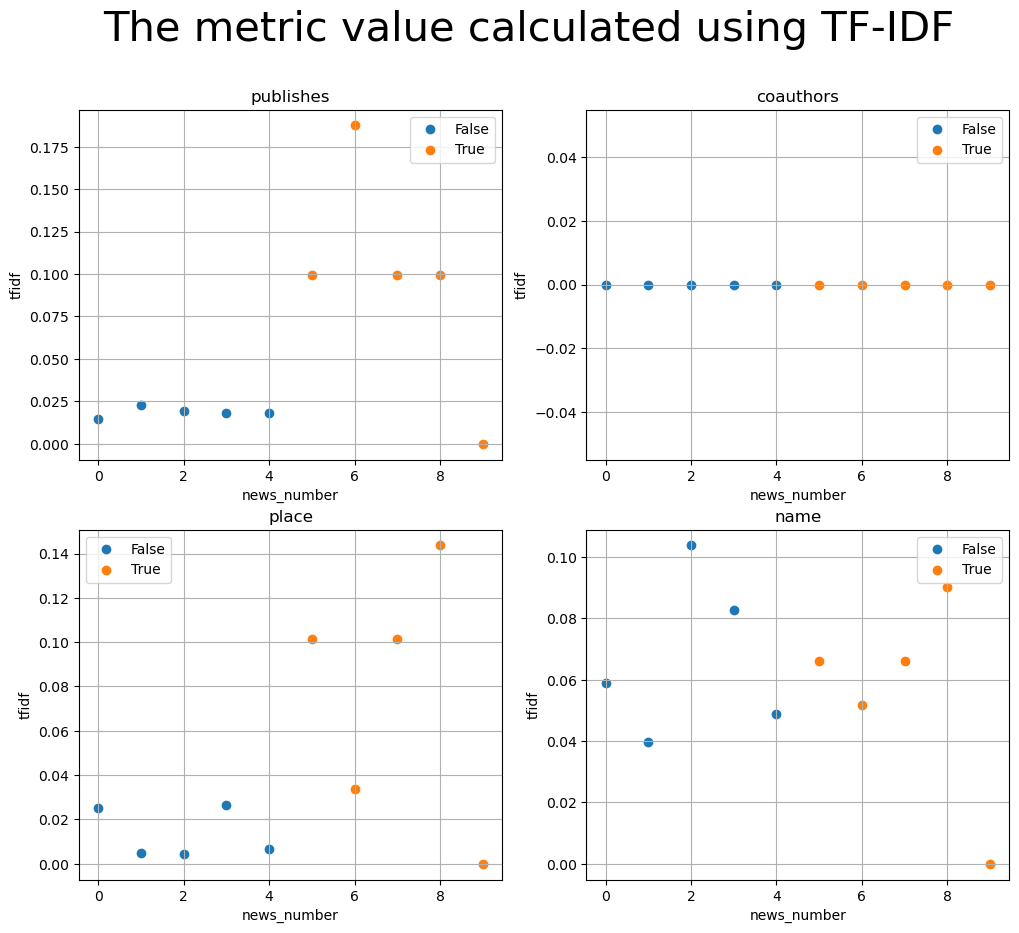

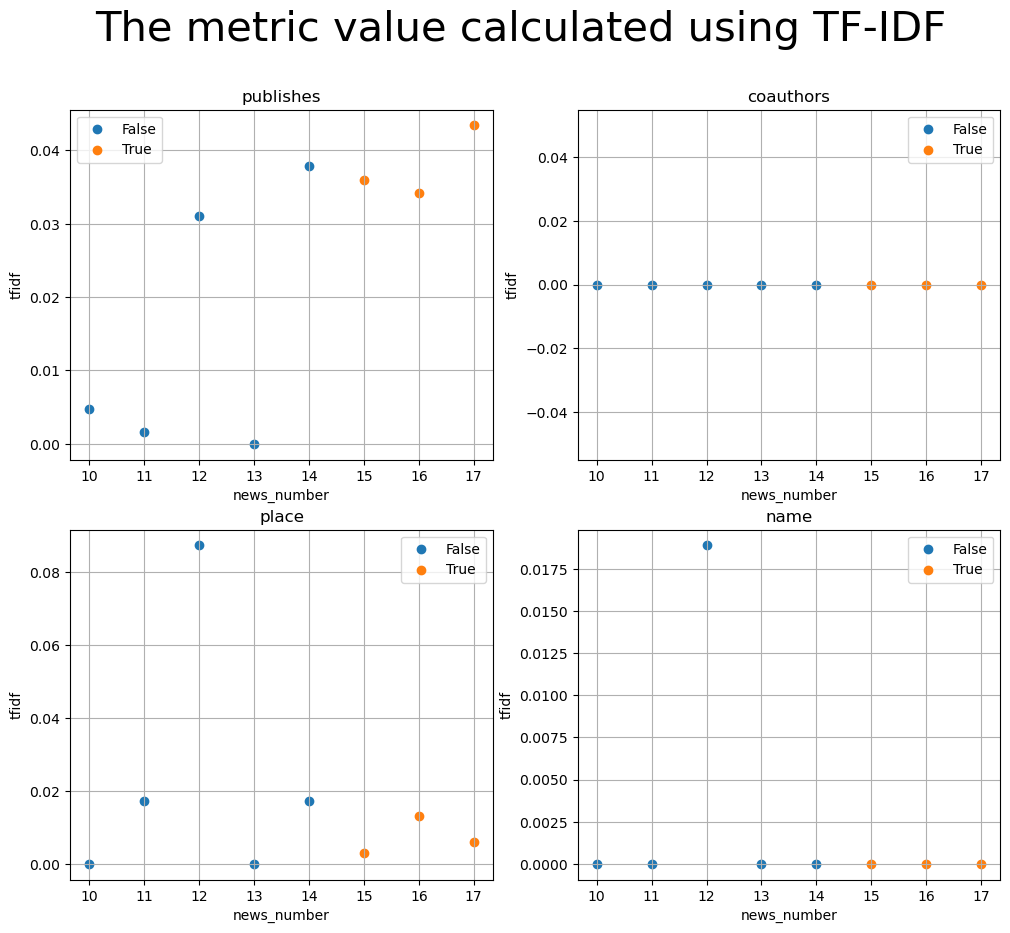

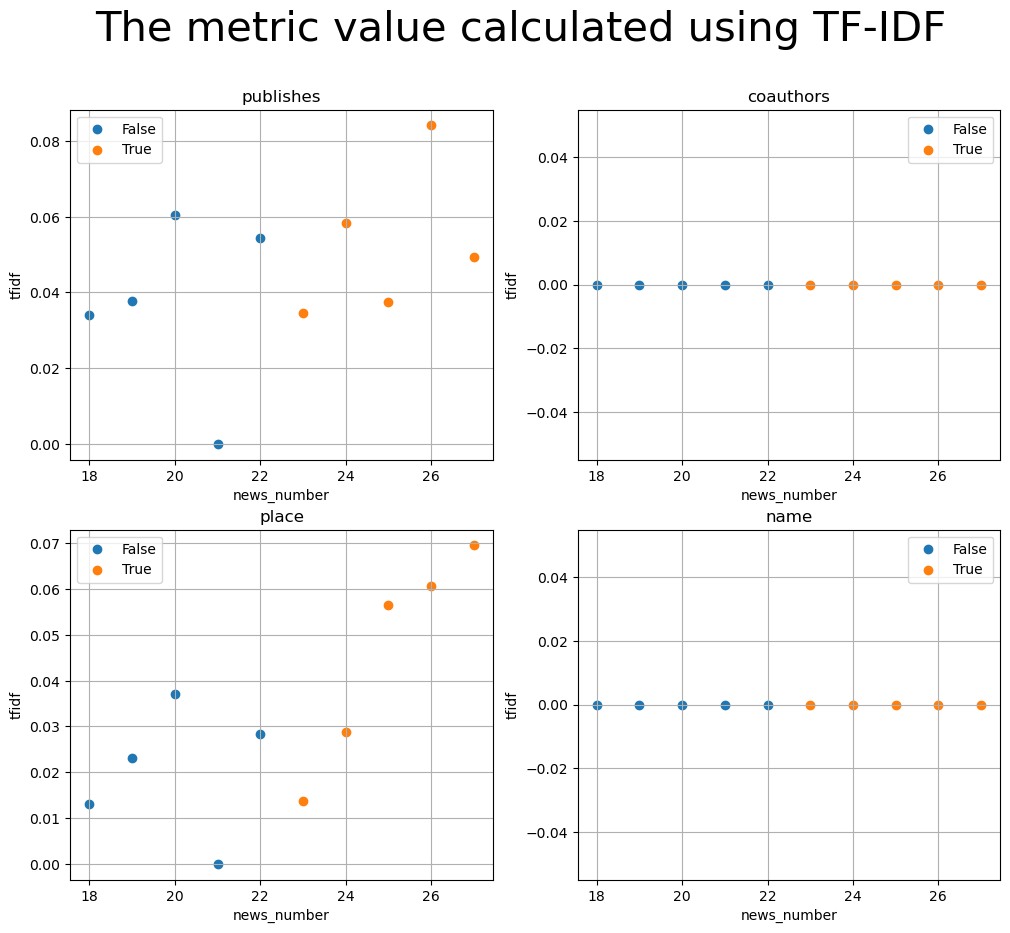

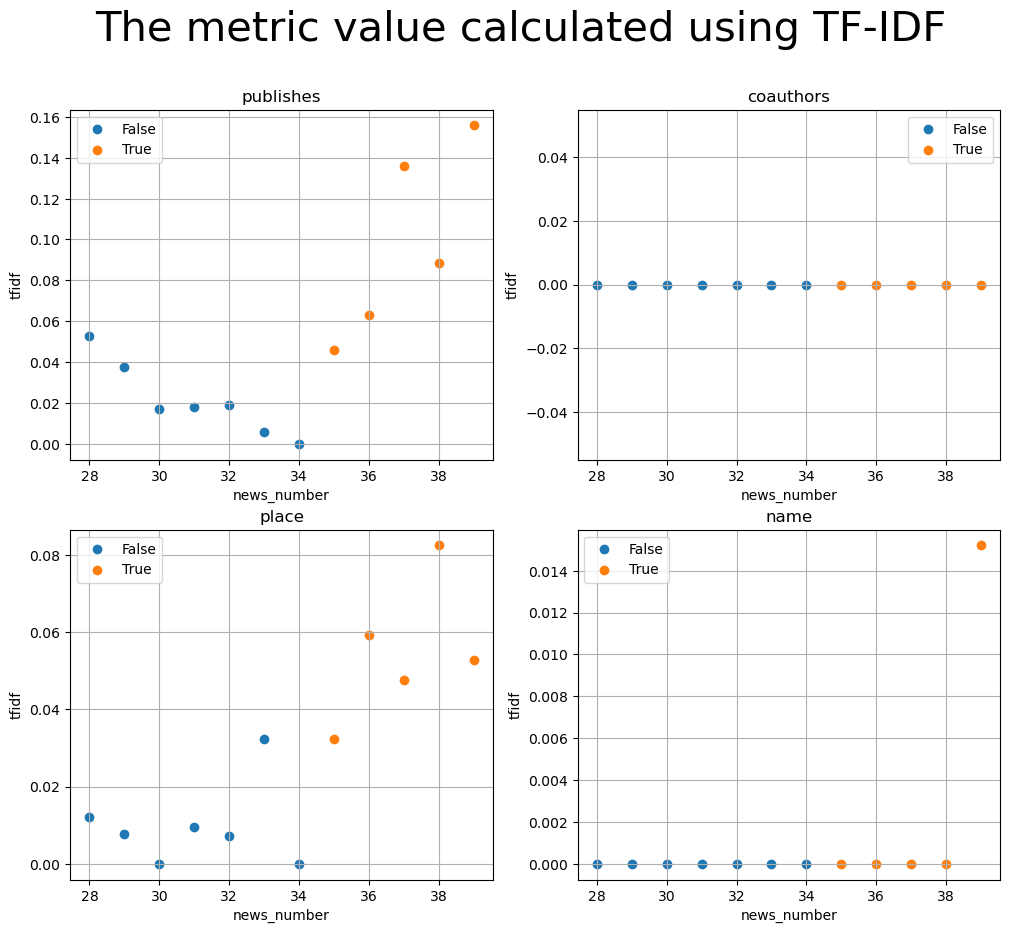

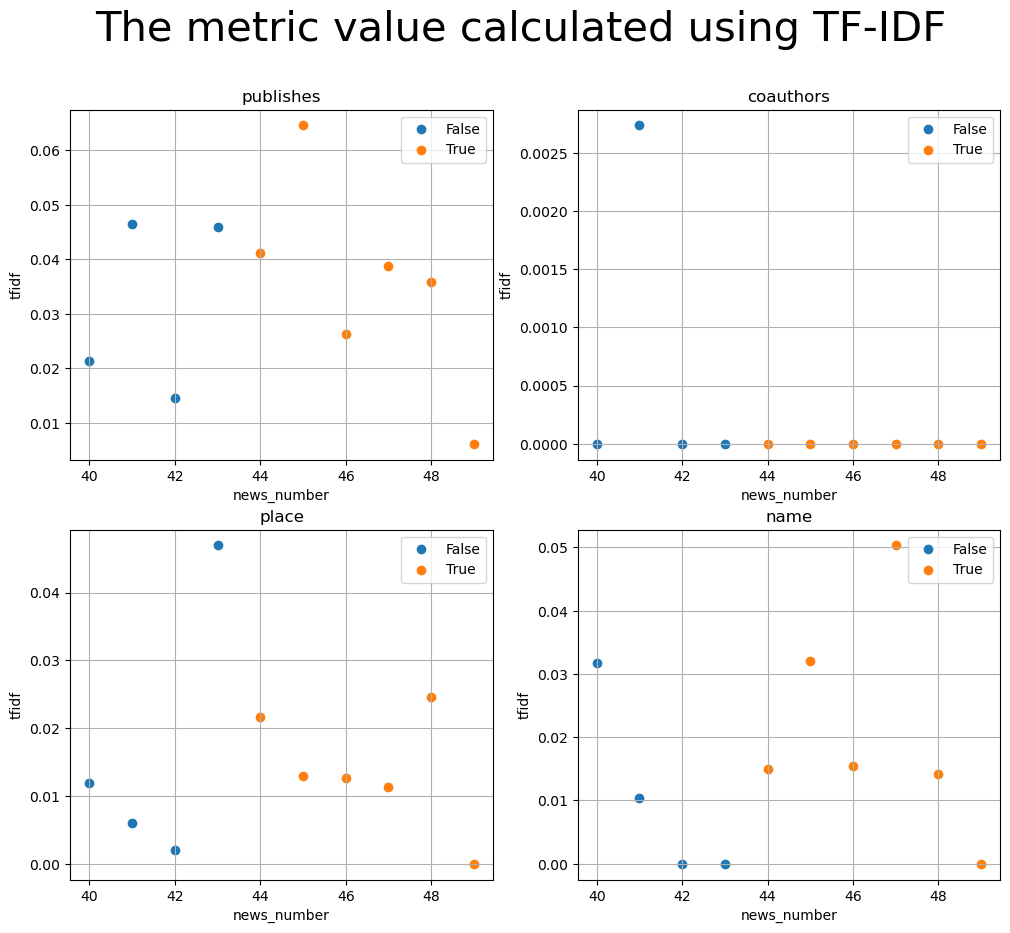

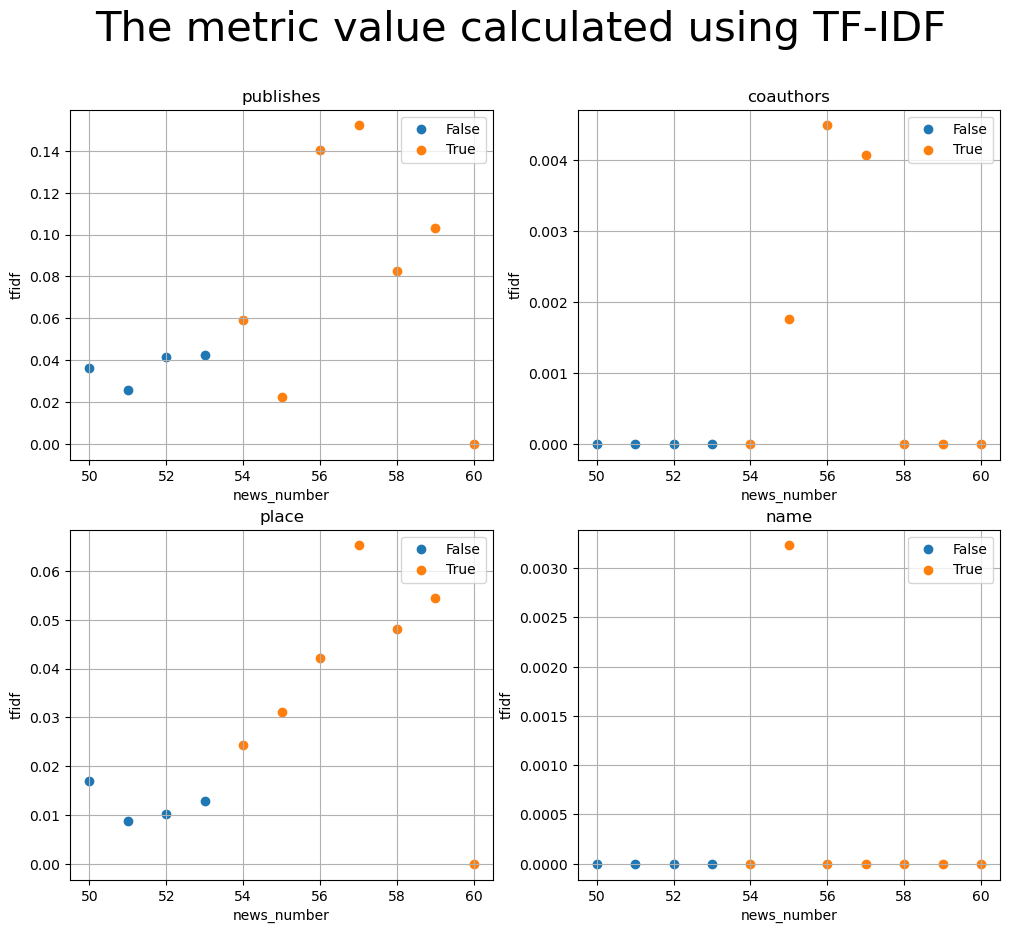

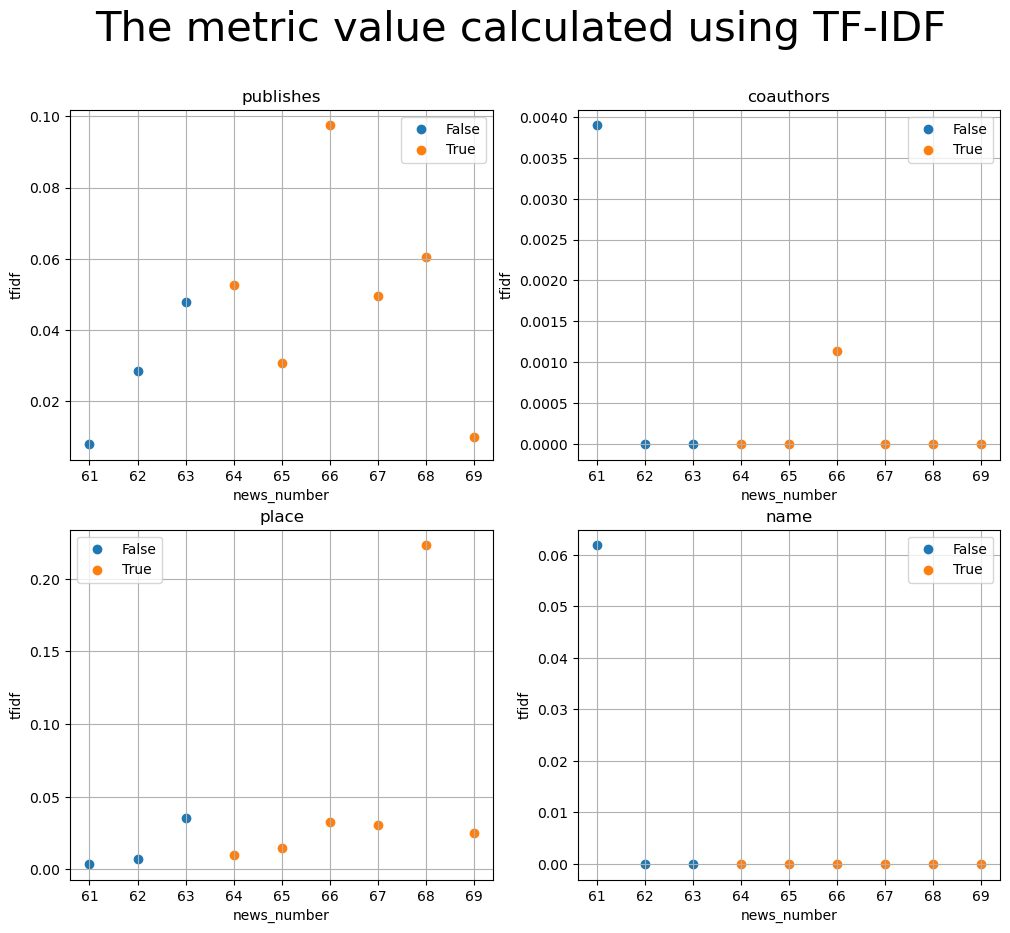

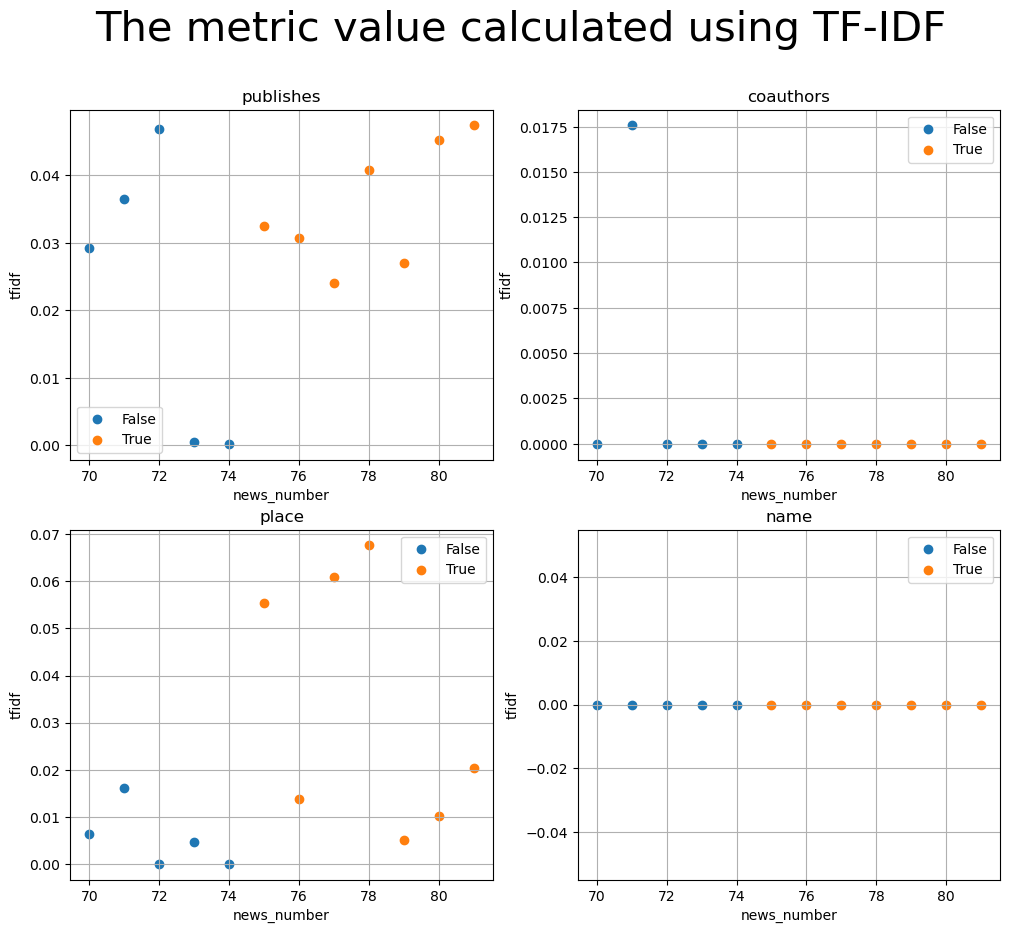

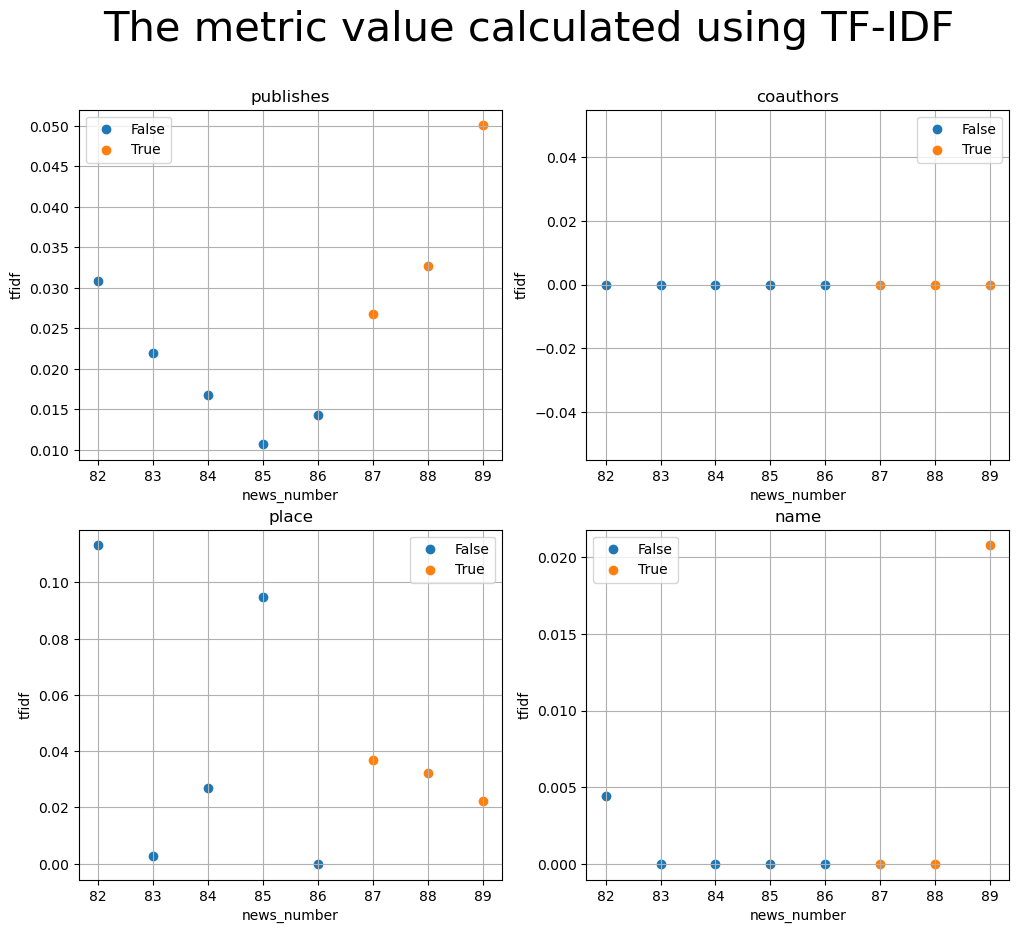

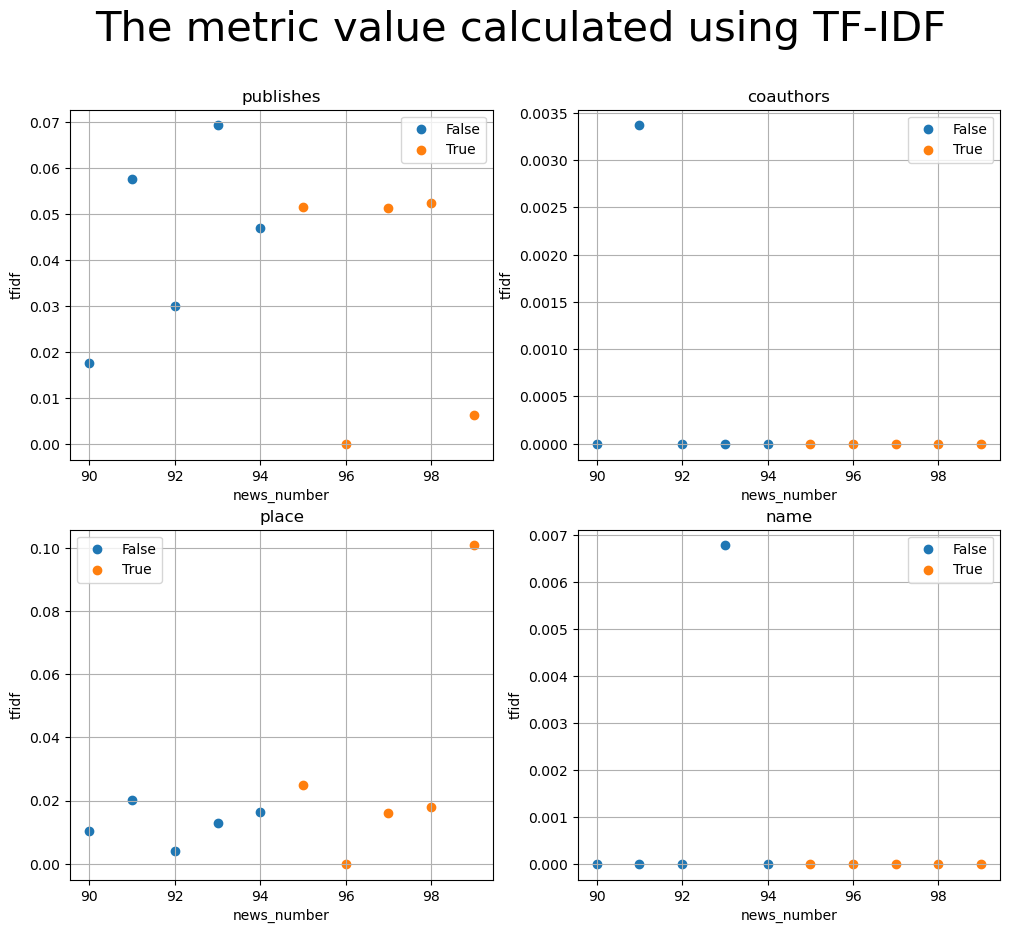

In [86]:
from itertools import compress

x_range = np.arange(0, len(c_corp_onedim), 1)
mask = [0 for i in range(len(c_rel_onedim))]
inv_mask = [0 for i in range(len(c_rel_onedim))]
for ind, i in enumerate(c_rel_onedim):
    mask[ind] = False if i == 0 else True
    inv_mask[ind] = True if i == 0 else False

start = 0
stop = 0
for ind, i in enumerate(c_rel):
    stop = start+len(i)
    x__ = x_range[start:stop]
    inv__ = inv_mask[start:stop]
    mask__ = mask[start:stop]
    publ = tf[0][start:stop]
    place = tf[1][start:stop]
    coauth = tf[2][start:stop]
    name = tf[3][start:stop]
    
    fig, ax = plt.subplots(figsize=(12,10), nrows=2, ncols=2)

    metric_name = 'tfidf'

    ax[0,0].set_ylabel(metric_name)
    ax[0,0].set_xlabel('news_number')
    ax[0,0].scatter(list(compress(x__, inv__)), list(compress(publ, inv__)), c='#1f77b4').set_label('False')
    ax[0,0].scatter(list(compress(x__, mask__)), list(compress(publ, mask__)), c='#ff7f0e').set_label('True')
    ax[0,0].set_title('publishes')
    ax[0,0].grid()
    ax[0,0].legend()

    ax[1,0].set_ylabel(metric_name)
    ax[1,0].set_xlabel('news_number')
    ax[1,0].scatter(list(compress(x__, inv__)), list(compress(place, inv__)), c='#1f77b4').set_label('False')
    ax[1,0].scatter(list(compress(x__, mask__)), list(compress(place, mask__)), c='#ff7f0e').set_label('True')
    ax[1,0].set_title('place')
    ax[1,0].grid()
    ax[1,0].legend()

    ax[0,1].set_ylabel(metric_name)
    ax[0,1].set_xlabel('news_number')
    ax[0,1].scatter(list(compress(x__, inv__)), list(compress(coauth, inv__)), c='#1f77b4').set_label('False')
    ax[0,1].scatter(list(compress(x__, mask__)), list(compress(coauth, mask__)), c='#ff7f0e').set_label('True')
    ax[0,1].set_title('coauthors')
    ax[0,1].grid()
    ax[0,1].legend()

    ax[1,1].set_ylabel(metric_name)
    ax[1,1].set_xlabel('news_number')
    ax[1,1].scatter(list(compress(x__, inv__)), list(compress(name, inv__)), c='#1f77b4').set_label('False')
    ax[1,1].scatter(list(compress(x__, mask__)), list(compress(name, mask__)), c='#ff7f0e').set_label('True')
    ax[1,1].set_title('name')
    ax[1,1].grid()
    ax[1,1].legend()

    fig.suptitle('The metric value calculated using TF-IDF', fontsize=30)
#     plt.show()
    start = start+len(i)
    plt.savefig(f'results/{metric_name}_{c_people_name[0][0]+c_people_name[0][1][0]}_for_{c_people_name[ind][0]+c_people_name[ind][1][0]}.png')

In [5]:
from rank_bm25 import BM25Okapi

tokenized_corpus = [parser.get_vocab(list((i.text for i in tokenize(doc)))) for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)
bm25_score = []

for doc in [" ".join(reference['publishes']), " ".join(reference['place']), 
             " ".join(reference['coauthors']), " ".join(args.name.split())]:
    
    bm25_score.append(bm25.get_scores(parser.get_vocab(list((i.text for i in tokenize(doc))))))

['1.yaml',
 '2_1.yaml',
 '2_2.yaml',
 '3.yaml',
 '4.yaml',
 '5.yaml',
 '6.yaml',
 '7.yaml',
 '8.yaml',
 '9.yaml']

In [2]:
# get vocabulary by istina
args = OmegaConf.load('default.yaml')
html = requests.get(args.istina_people).text
parser = Parser()
reference = parser.istina_parser(html)
vocabulary = parser.get_vocab(reference['publishes'] + reference['place'] + 
                              reference['coauthors'] + args.name.split())

In [3]:
# get vocabulary by news in corresponding .yaml fil
vocabulary = list(vocabulary)
corpus = []
relevant = []
actual_news = []
args = OmegaConf.load('default.yaml')
parser = Parser()
for item in tqdm(args.news):
    html = requests.get(item[0]).text
    text = parser.common_parser(html)
    if len(text):
        actual_news.append(item[0])
        relevant.append(item[1])
        corpus.append(text)
        vocabulary.extend(parser.get_vocab(list((i.text for i in tokenize(text)))))
vocabulary = list(set(vocabulary))

  0%|          | 0/9 [00:00<?, ?it/s]

In [4]:
args

{'name': 'Маслов Алексей Александрович', 'istina_people': 'https://istina.msu.ru/profile/Amaslov/', 'news': [['https://lenta.ru/news/2022/07/02/masloved/', 0], ['https://msk1.ru/text/world/2022/10/11/71727275/', 0], ['https://newizv-ru.turbopages.org/newizv.ru/s/news/incident/26-08-2021/smi-millioner-iz-truschob-artem-maslov-prigovoren-k-10-godam-v-oae', 0], ['https://www.rbc.ru/rbcfreenews/61b60da39a794770a69643ea', 0], ['https://lenta.ru/news/2019/01/21/bureya/', 0], ['https://lenta.ru/news/2022/05/26/maslov/', 1], ['https://lenta.ru/news/2022/10/11/taivan/', 1], ['https://lenta.ru/news/2022/05/26/maslov/', 1], ['https://mir24-tv.turbopages.org/mir24.tv/s/news/16527090/professor-mgu-obyasnil-pochemu-svmda-stanovitsya-centrom-prinyatiya-reshenii', 1]]}

### TF-IDF = TF(t,d) $\times$ IDF(t)
* t - term 
* d - document 
* TF(t,d) - term frequency - number of times term t appears in document d
* IDF(t) - inverse document frequency    IDF(t) $:= \log(\dfrac{1 + n}{1 + DF(t)} + 1)$
* DF(t) - the number of documents in the document set that contain the term t

### BM25 
is a bag-of-words retrieval function that rocks a set of documents based on the query terms appearing in each document, regardless of their proximity within the document.

BM25 score (score) of document D based on (key-words) query Q

$score(D, Q) := \sum_{i=1}^n IDF(q_i) \dfrac{f(q_i, D)(k_1+1)}{f(q_i, D)+k_1(1-b+b\frac{|D|}{avgdl})}$


* __avgdl__ - is the average document length in the text collection from which documents are drawn
* $f(q_i, D)$ - is the number of times that $q_{i}$ occurs in the document $D$
* $k_{1}$, $b$ are free parameters, usually chosen, in absence of an advanced optimization, as $k_{1}\in [1.2,2.0]$ and $b = 0.75$.

* $IDF(q_i) = \ln(\dfrac{N-n(q_i)+0.5}{n(q_i)+0.5}+1)$
* N is the total number of documents in the collection, 
* $n(q_i)$ is the number of documents containing $q_{i}$.

In [5]:
vectorizer = TfidfVectorizer(vocabulary = vocabulary)
X = vectorizer.fit_transform(corpus)

ans = vectorizer.transform([" ".join(reference['publishes']), " ".join(reference['place']), 
                            " ".join(reference['coauthors']), " ".join(args.name.split())])
tfidf_score = ans*X.transpose().toarray()

In [6]:
from rank_bm25 import BM25Okapi

tokenized_corpus = [parser.get_vocab(list((i.text for i in tokenize(doc)))) for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)
bm25_score = []

for doc in [" ".join(reference['publishes']), " ".join(reference['place']), 
             " ".join(reference['coauthors']), " ".join(args.name.split())]:
    
    bm25_score.append(bm25.get_scores(parser.get_vocab(list((i.text for i in tokenize(doc))))))

In [7]:
relevant, len(corpus), len(tokenized_corpus)

([0, 0, 0, 0, 0, 1, 1, 1], 8, 8)

In [8]:
tfidf_score

array([[0.        , 0.012735  , 0.00922112, 0.00935124, 0.00540737,
        0.05296861, 0.03871077, 0.05296861],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.19483869, 0.03310346, 0.19483869],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.07560775, 0.03494733, 0.10121826, 0.10264659, 0.10449746,
        0.10180605, 0.07512025, 0.10180605]])

In [9]:
bm25_score

[array([11.75629756,  1.10247305,  7.1504737 , 10.45553958, 11.9770484 ,
        29.42747571, 22.89043143, 29.42747571]),
 array([1.10091531, 0.        , 0.38361027, 1.71983886, 0.        ,
        4.58422067, 1.84852506, 4.58422067]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.40151244, 0.46499007, 0.27981135, 2.07213896, 0.36766264,
        0.29481337, 0.26966863, 0.29481337])]

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [81]:
tf = pd.DataFrame(np.array(tfidf_score).T)
tf['relevant'] = pd.Series(relevant, index=tt.index)
tf['cite'] = pd.Series(actual_news, index=tt.index)

In [82]:
tf

,0,1,2,3,relevant,cite
0,0.000000,0.000000,0.0,0.075608,0,https://lenta.ru/news/2022/07/02/masloved/
1,0.012735,0.000000,0.0,0.034947,0,https://msk1.ru/text/world/2022/10/11/71727275/
2,0.009221,0.000000,0.0,0.101218,0,https://newizv-ru.turbopages.org/newizv.ru/s/n...
3,0.009351,0.000000,0.0,0.102647,0,https://www.rbc.ru/rbcfreenews/61b60da39a79477...
4,0.005407,0.000000,0.0,0.104497,0,https://lenta.ru/news/2019/01/21/bureya/
5,0.052969,0.194839,0.0,0.101806,1,https://lenta.ru/news/2022/05/26/maslov/
6,0.038711,0.033103,0.0,0.075120,1,https://lenta.ru/news/2022/10/11/taivan/
7,0.052969,0.194839,0.0,0.101806,1,https://lenta.ru/news/2022/05/26/maslov/


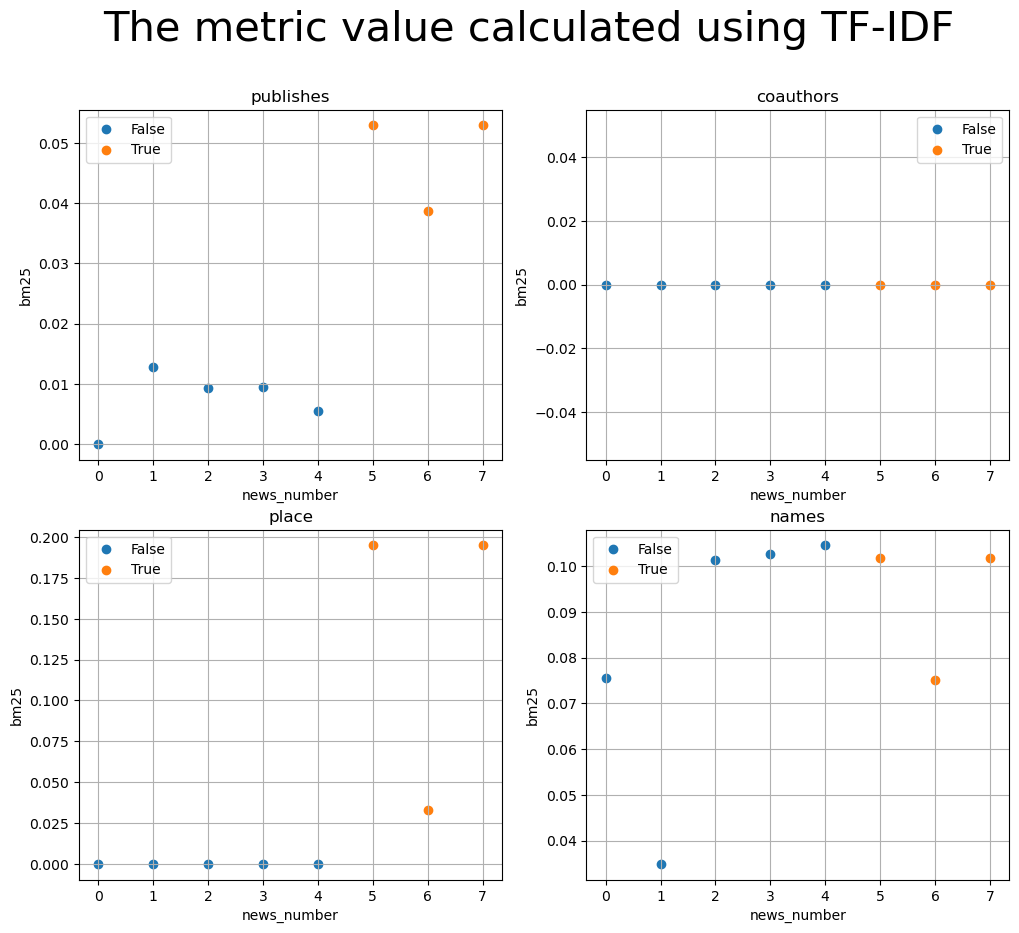

In [88]:
x_range = np.arange(0, len(corpus), 1)

for ind, i in enumerate(relevant):
    if i == 1:
        break
f_len = ind

fig, ax = plt.subplots(figsize=(12,10), nrows=2, ncols=2)

ax[0,0].set_ylabel('bm25')
ax[0,0].set_xlabel('news_number')
ax[0,0].scatter(x_range[:f_len], tf[0][:f_len], c='#1f77b4').set_label('False')
ax[0,0].scatter(x_range[f_len:], tf[0][f_len:], c='#ff7f0e').set_label('True')
ax[0,0].set_title('publishes')
ax[0,0].grid()
ax[0,0].legend()

ax[1,0].set_ylabel('bm25')
ax[1,0].set_xlabel('news_number')
ax[1,0].scatter(x_range[:f_len], tf[1][:f_len], c='#1f77b4').set_label('False')
ax[1,0].scatter(x_range[f_len:], tf[1][f_len:], c='#ff7f0e').set_label('True')
ax[1,0].set_title('place')
ax[1,0].grid()
ax[1,0].legend()

ax[0,1].set_ylabel('bm25')
ax[0,1].set_xlabel('news_number')
ax[0,1].scatter(x_range[:f_len], tf[2][:f_len], c='#1f77b4').set_label('False')
ax[0,1].scatter(x_range[f_len:], tf[2][f_len:], c='#ff7f0e').set_label('True')
ax[0,1].set_title('coauthors')
ax[0,1].grid()
ax[0,1].legend()

ax[1,1].set_ylabel('bm25')
ax[1,1].set_xlabel('news_number')
ax[1,1].scatter(x_range[:f_len], tf[3][:f_len], c='#1f77b4').set_label('False')
ax[1,1].scatter(x_range[f_len:], tf[3][f_len:], c='#ff7f0e').set_label('True')
ax[1,1].set_title('names')
ax[1,1].grid()
ax[1,1].legend()

fig.suptitle('The metric value calculated using TF-IDF', fontsize=30)
# plt.show()
plt.savefig('tfidf.png')

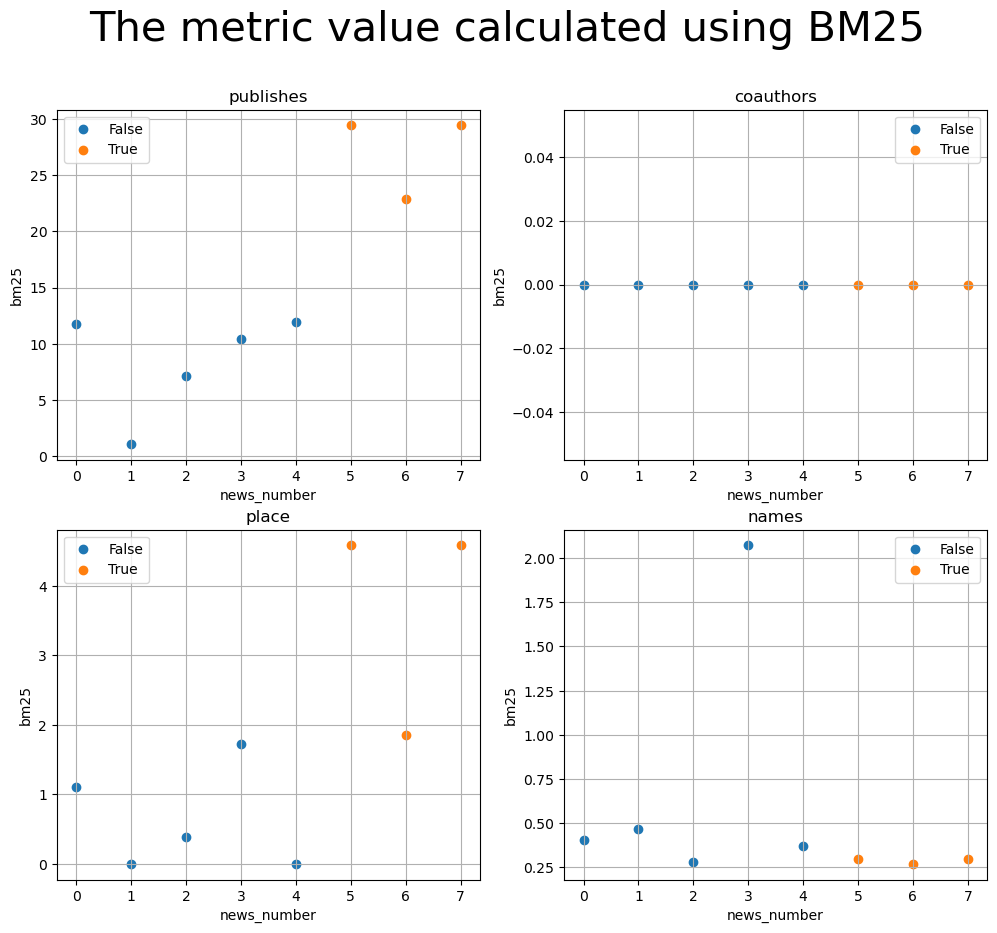

In [89]:
tt = pd.DataFrame(np.array(bm25_score).T)
tt['relevant'] = pd.Series(relevant, index=tt.index)
tt['cite'] = pd.Series(actual_news, index=tt.index)

x_range = np.arange(0, len(corpus), 1)

for ind, i in enumerate(relevant):
    if i == 1:
        break
f_len = ind

fig, ax = plt.subplots(figsize=(12,10), nrows=2, ncols=2)

ax[0,0].set_ylabel('bm25')
ax[0,0].set_xlabel('news_number')
ax[0,0].scatter(x_range[:f_len], tt[0][:f_len], c='#1f77b4').set_label('False')
ax[0,0].scatter(x_range[f_len:], tt[0][f_len:], c='#ff7f0e').set_label('True')
ax[0,0].set_title('publishes')
ax[0,0].grid()
ax[0,0].legend()

ax[1,0].set_ylabel('bm25')
ax[1,0].set_xlabel('news_number')
ax[1,0].scatter(x_range[:f_len], tt[1][:f_len], c='#1f77b4').set_label('False')
ax[1,0].scatter(x_range[f_len:], tt[1][f_len:], c='#ff7f0e').set_label('True')
ax[1,0].set_title('place')
ax[1,0].grid()
ax[1,0].legend()

ax[0,1].set_ylabel('bm25')
ax[0,1].set_xlabel('news_number')
ax[0,1].scatter(x_range[:f_len], tt[2][:f_len], c='#1f77b4').set_label('False')
ax[0,1].scatter(x_range[f_len:], tt[2][f_len:], c='#ff7f0e').set_label('True')
ax[0,1].set_title('coauthors')
ax[0,1].grid()
ax[0,1].legend()

ax[1,1].set_ylabel('bm25')
ax[1,1].set_xlabel('news_number')
ax[1,1].scatter(x_range[:f_len], tt[3][:f_len], c='#1f77b4').set_label('False')
ax[1,1].scatter(x_range[f_len:], tt[3][f_len:], c='#ff7f0e').set_label('True')
ax[1,1].set_title('names')
ax[1,1].grid()
ax[1,1].legend()

fig.suptitle('The metric value calculated using BM25', fontsize=30)
# plt.show()
plt.savefig('bm25.png')